In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors

from clustering_evaluation import ClusterPurity
evaluator=ClusterPurity()

import hdbscan

/home/daikiri/.conda/envs/daikiri/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic Data:

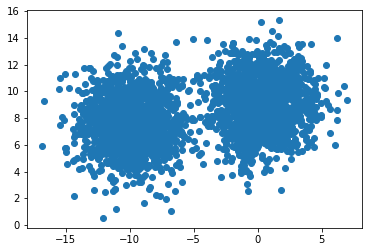

In [4]:
X, y = make_blobs(n_samples=3000, n_features=10, centers=2, cluster_std=2.0,random_state=23)
plt.scatter(X[:,0], X[:,1])

## Find Optimal Epsion Value:

In [5]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

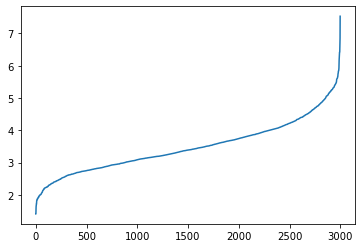

In [6]:
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.plot(distances)

In [7]:
clusterer_precomputed=hdbscan.HDBSCAN(algorithm='best', alpha=0.3, metric='l1',  
                          min_samples=50, min_cluster_size=1000, cluster_selection_epsilon= 5.0,
                          cluster_selection_method='leaf', allow_single_cluster=True,
                          core_dist_n_jobs=-1)

In [8]:
clusterer_precomputed.fit(X)

HDBSCAN(allow_single_cluster=True, alpha=0.3, cluster_selection_epsilon=5.0,
        cluster_selection_method='leaf', core_dist_n_jobs=-1, metric='l1',
        min_cluster_size=1000, min_samples=50)

In [9]:
labels=clusterer_precomputed.labels_

In [10]:
print ('cluster labels: ', set(labels))
y_list=labels.tolist()
for label in set(labels):
    print (label,' counts: ',y_list.count(label))

cluster labels:  {0, 1}
0  counts:  1500
1  counts:  1500


# t-SNE Visualizing:

In [11]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

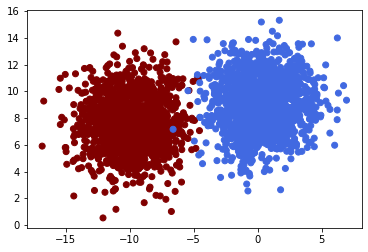

In [12]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(labels))


## Precision, Recall, F1 and Purity Evaluation:

In [13]:
#----------- Evaluation based on Precision, Recall, Accuracy and F1-score: -------#
accuracy = accuracy_score(y, labels)
print('Accuracy: %f' % accuracy)

precision = precision_score(y, labels, average='micro')
print('Precision: %f' % precision)

recall = recall_score(y, labels, average='micro')
print('Recall: %f' % recall)

f1 = f1_score(y, labels, average='micro')
print('F1 score: %f' % f1)
print ('Purity: ' , evaluator.purity_score(y_true=y, y_pred=labels))

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
Purity:  1.0


# Baselines:

## Random Clustering:

In [14]:
y_random=np.random.choice([0,1], size=X.shape[0])

#----------- Evaluation based on Precision, Recall, Accuracy and F1-score: -------#
accuracy = accuracy_score(y, y_random)
print('Accuracy: %f' % accuracy)

precision = precision_score(y, y_random, average='weighted')
print('Precision: %f' % precision)

recall = recall_score(y, y_random, average='weighted')
print('Recall: %f' % recall)

f1 = f1_score(y, y_random, average='weighted')
print('F1 score: %f' % f1)
print ('Purity: ' , evaluator.purity_score(y_true=y, y_pred=y_random))

Accuracy: 0.494333
Precision: 0.494333
Recall: 0.494333
F1 score: 0.494329
Purity:  0.5056666666666667


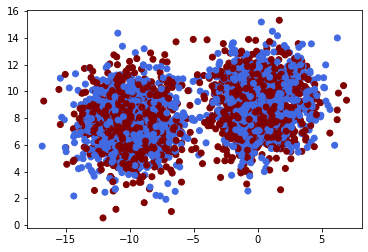

In [15]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(y_random))